In [12]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

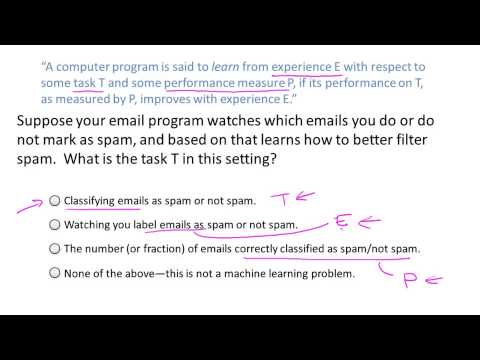

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('B2dbJ3-sEHo')

In [80]:
import IPython
# dir(IPython)

In [9]:
i = IPython.version_info
print i

(5, 1, 0, '')


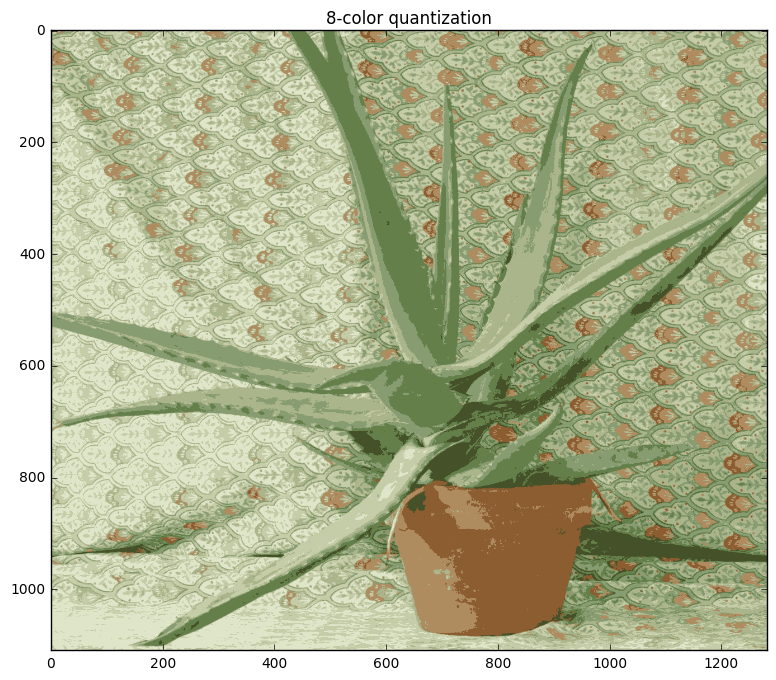

In [65]:
K = 2**3 # level of quantization; choose for example, 8 colors

img = cv2.imread('aloeR.jpg')
Z = img.reshape((-1,3))  #-1 combines the first two dimenesions
# print(Z.shape)

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make output image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(res2,4));
plt.title('8-color quantization');

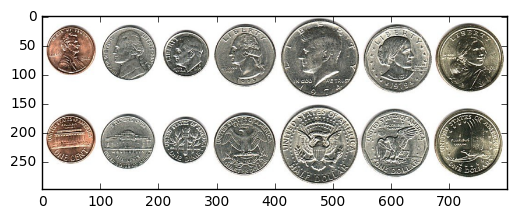

In [33]:
coins = cv2.imread('coins.png')
plt.imshow(cv2.cvtColor(coins,4));

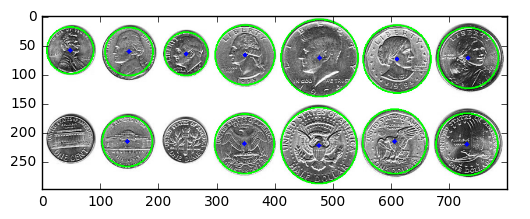

In [54]:
gray = cv2.cvtColor(coins,cv2.COLOR_RGB2GRAY)
# gray = cv2.Canny(gray,50,150,apertureSize=3)

# circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,200, param1=150,param2=30,minRadius=50,maxRadius=300)
circles = cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,20,minRadius=20,maxRadius=90)

gray = cv2.merge((gray,gray,gray))

# circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(gray,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(gray,(i[0],i[1]),2,(0,0,255),3)

# plt.imshow(cv2.cvtColor(coins,4));
plt.imshow(gray, 'gray');

In [31]:
help(cv2.HoughCircles)

Help on built-in function HoughCircles:

HoughCircles(...)
    HoughCircles(image, method, dp, minDist[, circles[, param1[, param2[, minRadius[, maxRadius]]]]]) -> circles



In [45]:
help(cv2.Canny)

Help on built-in function Canny:

Canny(...)
    Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges  or  Canny(dx, dy, threshold1, threshold2[, edges[, L2gradient]]) -> edges



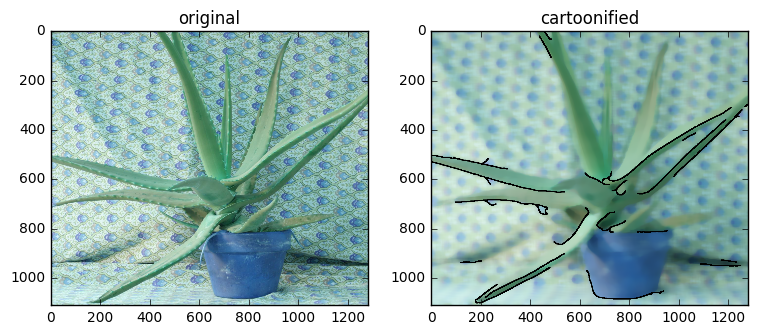

In [60]:
#fun demonstration of median-blur to "cartoonify" a real image
tulips = cv2.imread('aloeR.jpg')
tublur = cv2.medianBlur(tulips,29)


#we'll cover Canny edge detection and dilation shortly
edge=cv2.Canny(tublur,10,150)
kernel = np.ones((5,5),np.uint8)
edge = cv2.dilate(edge,kernel,iterations = 1)
tublur[edge==255]=0

plt.figure(figsize=(9,9))
plt.subplot(1,2,1)
plt.imshow(tulips)
plt.title('original')
plt.subplot(1,2,2)
plt.imshow(tublur)
plt.title('cartoonified');

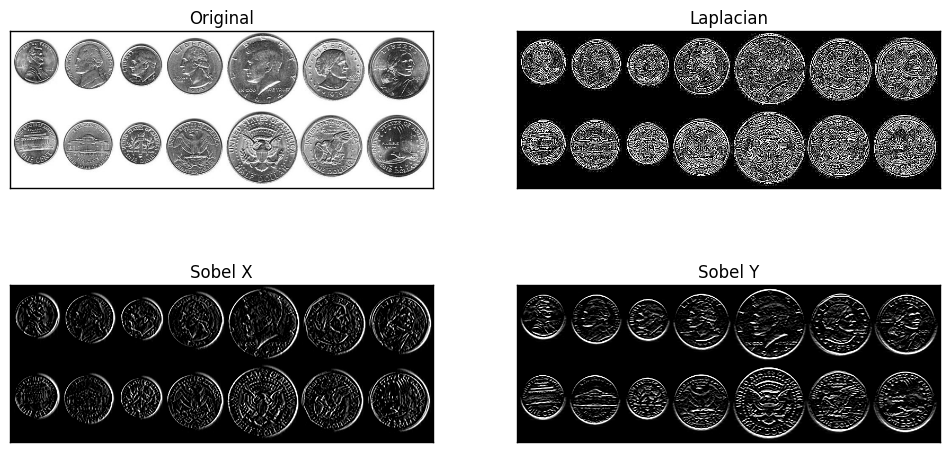

In [79]:
#basic high-pass filtering example;
#high-pass filtering responds to derivatives, or spatial changes in 
#images
img = cv2.imread('coins.png',0)
 
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx=cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely=cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.imshow(img,cmap = 'gray')
plt.title('Original')
plt.xticks([])
plt.yticks([])
plt.subplot(2,2,2); plt.imshow(laplacian,cmap='gray')
plt.title('Laplacian')
plt.xticks([]), plt.yticks([])
plt.clim([0, 45])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap='gray')
plt.title('Sobel X')
plt.xticks([]), plt.yticks([])
plt.clim([0, 4500])
plt.subplot(2,2,4),plt.imshow(sobely,cmap='gray')
plt.title('Sobel Y')
plt.xticks([]), plt.yticks([])
plt.clim([0, 4500])

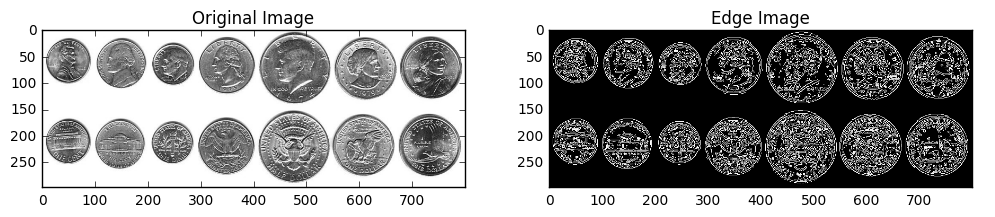

In [77]:
#Canny edge detection
#read about the theory here:
#http://docs.opencv.org/3.1.0/da/d22/tutorial_py_canny.html

img = cv2.imread('coins.png',0) #note that the last 0 parameter converts the image to grayscale
edge = cv2.Canny(img, 100, 200)

plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(edge,cmap = 'gray')
plt.title('Edge Image')